In [214]:
import geopandas as gpd
from api_call import api_call_multipolygons

%load_ext autoreload
%autoreload 2

In [22]:
cities = gpd.read_file('../raw_data/eu_cities.json')
cities

,city_name,country,geometry
0,Avilés,Spain,"MULTIPOLYGON (((-6.01180 43.44690, -6.00290 43..."
1,Oviedo,Spain,"MULTIPOLYGON (((-6.16250 43.03300, -6.15920 43..."
2,L'Aquila,Italy,"MULTIPOLYGON (((13.38080 42.18140, 13.39060 42..."
3,Pescara,Italy,"MULTIPOLYGON (((14.22960 42.41650, 14.24540 42..."
4,Altamura,Italy,"MULTIPOLYGON (((16.47270 40.97980, 16.44160 40..."
...,...,...,...
558,Yozgat,Turkey,"MULTIPOLYGON (((35.47180 39.18680, 35.48110 39..."
559,Bitola,NorthMacedonia,"MULTIPOLYGON (((21.51090 40.91160, 21.51120 40..."
560,Prilep,NorthMacedonia,"MULTIPOLYGON (((21.92760 41.10260, 21.92320 41..."
561,Tetovo,NorthMacedonia,"MULTIPOLYGON (((20.75460 41.94350, 20.76990 41..."


In [23]:
cities[cities['country'] == 'Greece']

,city_name,country,geometry
212,Athens,Greece,"MULTIPOLYGON (((23.71660 38.00970, 23.71540 38..."
213,Irakleio,Greece,"MULTIPOLYGON (((23.78290 38.04780, 23.78520 38..."
214,Ioannina,Greece,"MULTIPOLYGON (((20.92080 39.56410, 20.92620 39..."
215,Thessaloniki,Greece,"MULTIPOLYGON (((22.89850 40.64240, 22.90100 40..."
216,Kavala,Greece,"MULTIPOLYGON (((24.25090 40.96510, 24.33620 40..."
217,Kalamata,Greece,"MULTIPOLYGON (((22.02130 37.02040, 22.02120 37..."
218,Volos,Greece,"MULTIPOLYGON (((22.81900 39.27340, 22.82240 39..."


In [24]:
athens = cities[cities['city_name']=='Athens'].reset_index(drop=True)['geometry'][0]
athens.bounds

(23.6855, 37.9464, 23.7893, 38.031)

In [32]:
athens_y = api_call_multipolygons(multipolygon=athens,coord_uncertainty="0,1500",year="0,2023")

In [33]:
len(athens_y[0])

7800

In [34]:
european_capitals = ['Amsterdam', 'Andorra la Vella', 'Athens', 'Baku', 'Belgrade', 'Berlin', 'Bern', 'Bratislava', 'Brussels', 'Bucharest', 'Budapest', 'Chisinau', 'Copenhagen', 'Dublin', 'Helsinki', 'Kyiv', 'Lisbon', 'Ljubljana', 'London', 'Luxembourg', 'Madrid', 'Minsk', 'Monaco', 'Moscow', 'Nicosia', 'North Nicosia', 'Oslo', 'Paris', 'Podgorica', 'Prague', 'Reykjavik', 'Riga', 'Rome', 'San Marino', 'Sarajevo', 'Skopje', 'Sofia', 'Stockholm', 'Tallinn', 'Tbilisi', 'Tirana', 'Vaduz', 'Valletta', 'Vatican City', 'Vienna', 'Vilnius', 'Warsaw', 'Yerevan', 'Zagreb']


In [35]:
cities[cities['city_name'].isin(european_capitals)]

,city_name,country,geometry
94,Luxembourg,Luxembourg,"MULTIPOLYGON (((6.09680 49.56800, 6.10400 49.5..."
212,Athens,Greece,"MULTIPOLYGON (((23.71660 38.00970, 23.71540 38..."
283,Helsinki,Finland,"MULTIPOLYGON (((24.36860 59.91070, 24.36920 59..."
315,Berlin,Germany,"MULTIPOLYGON (((13.50020 52.61380, 13.50320 52..."
395,Oslo,Norway,"MULTIPOLYGON (((10.73250 59.85400, 10.72920 59..."
400,Ljubljana,Slovenia,"MULTIPOLYGON (((14.43940 45.97610, 14.44960 45..."
421,Amsterdam,Netherlands,"MULTIPOLYGON (((5.01990 52.32420, 5.00070 52.3..."
469,Valletta,Malta,"MULTIPOLYGON (((14.51180 35.89310, 14.51510 35..."
499,Stockholm,Sweden,"MULTIPOLYGON (((17.86390 59.26830, 17.87270 59..."
562,Podgorica,Montenegro,"MULTIPOLYGON (((19.41650 42.32890, 19.41460 42..."


In [36]:
capitals = cities[cities['city_name'].isin(european_capitals)].reset_index(drop=True)
capitals

,city_name,country,geometry
0,Luxembourg,Luxembourg,"MULTIPOLYGON (((6.09680 49.56800, 6.10400 49.5..."
1,Athens,Greece,"MULTIPOLYGON (((23.71660 38.00970, 23.71540 38..."
2,Helsinki,Finland,"MULTIPOLYGON (((24.36860 59.91070, 24.36920 59..."
3,Berlin,Germany,"MULTIPOLYGON (((13.50020 52.61380, 13.50320 52..."
4,Oslo,Norway,"MULTIPOLYGON (((10.73250 59.85400, 10.72920 59..."
5,Ljubljana,Slovenia,"MULTIPOLYGON (((14.43940 45.97610, 14.44960 45..."
6,Amsterdam,Netherlands,"MULTIPOLYGON (((5.01990 52.32420, 5.00070 52.3..."
7,Valletta,Malta,"MULTIPOLYGON (((14.51180 35.89310, 14.51510 35..."
8,Stockholm,Sweden,"MULTIPOLYGON (((17.86390 59.26830, 17.87270 59..."
9,Podgorica,Montenegro,"MULTIPOLYGON (((19.41650 42.32890, 19.41460 42..."


<Axes: >

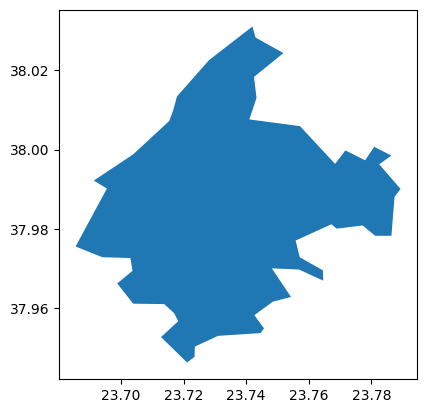

In [39]:
capitals[capitals['city_name']=='Athens'].plot()

In [47]:
swiss = gpd.read_file('../raw_data/raw_countries/gadm41_CHE_2.json')
swiss

,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,CHE.1.1_1,CHE,Switzerland,CHE.1_1,Aargau,NA,Aarau,NA,NA,District,District,NA,CH.AG.AA,"MULTIPOLYGON (((8.08800 47.32320, 8.08670 47.3..."
1,CHE.1.2_1,CHE,Switzerland,CHE.1_1,Aargau,NA,Baden,NA,NA,District,District,NA,CH.AG.BA,"MULTIPOLYGON (((8.36700 47.40370, 8.37940 47.4..."
2,CHE.1.3_1,CHE,Switzerland,CHE.1_1,Aargau,NA,Bremgarten,NA,NA,District,District,NA,CH.AG.BG,"MULTIPOLYGON (((8.42720 47.30400, 8.42230 47.3..."
3,CHE.1.4_1,CHE,Switzerland,CHE.1_1,Aargau,NA,Brugg,NA,NA,District,District,NA,CH.AG.BR,"MULTIPOLYGON (((8.09900 47.42480, 8.09510 47.4..."
4,CHE.1.5_1,CHE,Switzerland,CHE.1_1,Aargau,NA,Kulm,NA,NA,District,District,NA,CH.AG.KU,"MULTIPOLYGON (((8.20690 47.24690, 8.20420 47.2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,CHE.26.9_1,CHE,Switzerland,CHE.26_1,Zürich,NA,Pfäffikon,NA,NA,District,District,NA,CH.ZH.PF,"MULTIPOLYGON (((8.85480 47.36060, 8.84320 47.3..."
165,CHE.26.10_1,CHE,Switzerland,CHE.26_1,Zürich,NA,Schaffhausen,NA,NA,District,District,NA,NA,"MULTIPOLYGON (((8.57200 47.57580, 8.56860 47.5..."
166,CHE.26.11_1,CHE,Switzerland,CHE.26_1,Zürich,NA,Uster,NA,NA,District,District,NA,CH.ZH.US,"MULTIPOLYGON (((8.73190 47.29340, 8.73200 47.2..."
167,CHE.26.12_1,CHE,Switzerland,CHE.26_1,Zürich,NA,Winterthur,NA,NA,District,District,NA,CH.ZH.WT,"MULTIPOLYGON (((8.90240 47.45920, 8.90910 47.4..."


In [51]:
capitals

,city_name,country,geometry
0,Luxembourg,Luxembourg,"MULTIPOLYGON (((6.09680 49.56800, 6.10400 49.5..."
1,Athens,Greece,"MULTIPOLYGON (((23.71660 38.00970, 23.71540 38..."
2,Helsinki,Finland,"MULTIPOLYGON (((24.36860 59.91070, 24.36920 59..."
3,Berlin,Germany,"MULTIPOLYGON (((13.50020 52.61380, 13.50320 52..."
4,Oslo,Norway,"MULTIPOLYGON (((10.73250 59.85400, 10.72920 59..."
5,Ljubljana,Slovenia,"MULTIPOLYGON (((14.43940 45.97610, 14.44960 45..."
6,Amsterdam,Netherlands,"MULTIPOLYGON (((5.01990 52.32420, 5.00070 52.3..."
7,Valletta,Malta,"MULTIPOLYGON (((14.51180 35.89310, 14.51510 35..."
8,Stockholm,Sweden,"MULTIPOLYGON (((17.86390 59.26830, 17.87270 59..."
9,Podgorica,Montenegro,"MULTIPOLYGON (((19.41650 42.32890, 19.41460 42..."


In [65]:
import pandas as pd
zurich = swiss[swiss['NAME_2']=='Zürich'][['NAME_2','COUNTRY','geometry']]
zurich['NAME_2'] = 'Zurich'
zurich.columns = capitals.columns
capitals = pd.concat([capitals,zurich])
capitals

,city_name,country,geometry
0,Luxembourg,Luxembourg,"MULTIPOLYGON (((6.09680 49.56800, 6.10400 49.5..."
1,Athens,Greece,"MULTIPOLYGON (((23.71660 38.00970, 23.71540 38..."
2,Helsinki,Finland,"MULTIPOLYGON (((24.36860 59.91070, 24.36920 59..."
3,Berlin,Germany,"MULTIPOLYGON (((13.50020 52.61380, 13.50320 52..."
4,Oslo,Norway,"MULTIPOLYGON (((10.73250 59.85400, 10.72920 59..."
5,Ljubljana,Slovenia,"MULTIPOLYGON (((14.43940 45.97610, 14.44960 45..."
6,Amsterdam,Netherlands,"MULTIPOLYGON (((5.01990 52.32420, 5.00070 52.3..."
7,Valletta,Malta,"MULTIPOLYGON (((14.51180 35.89310, 14.51510 35..."
8,Stockholm,Sweden,"MULTIPOLYGON (((17.86390 59.26830, 17.87270 59..."
9,Podgorica,Montenegro,"MULTIPOLYGON (((19.41650 42.32890, 19.41460 42..."


In [66]:
france = gpd.read_file('../raw_data/raw_countries/gadm41_FRA_2.json')
paris = france[france['NAME_2'] == 'Paris'][['NAME_2','COUNTRY','geometry']]
paris.columns = capitals.columns
capitals = pd.concat([capitals,paris])
capitals

,city_name,country,geometry
0,Luxembourg,Luxembourg,"MULTIPOLYGON (((6.09680 49.56800, 6.10400 49.5..."
1,Athens,Greece,"MULTIPOLYGON (((23.71660 38.00970, 23.71540 38..."
2,Helsinki,Finland,"MULTIPOLYGON (((24.36860 59.91070, 24.36920 59..."
3,Berlin,Germany,"MULTIPOLYGON (((13.50020 52.61380, 13.50320 52..."
4,Oslo,Norway,"MULTIPOLYGON (((10.73250 59.85400, 10.72920 59..."
5,Ljubljana,Slovenia,"MULTIPOLYGON (((14.43940 45.97610, 14.44960 45..."
6,Amsterdam,Netherlands,"MULTIPOLYGON (((5.01990 52.32420, 5.00070 52.3..."
7,Valletta,Malta,"MULTIPOLYGON (((14.51180 35.89310, 14.51510 35..."
8,Stockholm,Sweden,"MULTIPOLYGON (((17.86390 59.26830, 17.87270 59..."
9,Podgorica,Montenegro,"MULTIPOLYGON (((19.41650 42.32890, 19.41460 42..."


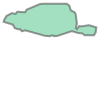

In [70]:
paris['geometry'][49]

In [71]:
athens_y = api_call_multipolygons(multipolygon=paris['geometry'][49],coord_uncertainty="0,1000",year="2010,2023")

KeyboardInterrupt: 

In [73]:
import numpy as np
np_y = np.array(athens_y)
print(np_y.shape)

(1, 7800, 2)


array([[37.974113, 23.708609],
       [37.977833, 23.717316],
       [37.9832  , 23.744875],
       ...,
       [37.983333, 23.733333],
       [37.983333, 23.733333],
       [38.      , 23.75    ]])

In [80]:
capitals = capitals.reset_index(drop=True).drop([0,7,9]).reset_index(drop=True)

In [81]:
capitals.to_file('../data/capital_shapes.json',driver='GeoJSONSeq')

In [2]:
capitals = gpd.read_file('../data/capital_shapes.json')

In [3]:
athens_bounds = capitals[capitals['city_name']=='Athens'].total_bounds

In [313]:
european_capitals = gpd.read_file('../raw_data/raw_countries/gadm41_ESP_3.json')
european_capitals[european_capitals['NAME_2']=='Barcelona']

,GID_3,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,NL_NAME_2,NAME_3,VARNAME_3,NL_NAME_3,TYPE_3,ENGTYPE_3,CC_3,HASC_3,geometry
190,ESP.6.1.1_1,ESP,Spain,ESP.6_1,Cataluña,NA,ESP.6.1_1,Barcelona,NA,n.a.(162),NA,NA,Comarca,Comarca,NA,NA,"MULTIPOLYGON (((1.71920 42.28400, 1.71840 42.2..."
191,ESP.6.1.2_1,ESP,Spain,ESP.6_1,Cataluña,NA,ESP.6.1_1,Barcelona,NA,n.a.(164),NA,NA,Comarca,Comarca,NA,NA,"MULTIPOLYGON (((1.64490 42.11260, 1.65190 42.1..."
192,ESP.6.1.3_1,ESP,Spain,ESP.6_1,Cataluña,NA,ESP.6.1_1,Barcelona,NA,n.a.(29),NA,NA,Comarca,Comarca,NA,NA,"MULTIPOLYGON (((2.23710 41.42490, 2.23210 41.4..."
193,ESP.6.1.4_1,ESP,Spain,ESP.6_1,Cataluña,NA,ESP.6.1_1,Barcelona,NA,n.a.(30),NA,NA,Comarca,Comarca,NA,NA,"MULTIPOLYGON (((1.73790 41.57610, 1.74260 41.5..."
194,ESP.6.1.5_1,ESP,Spain,ESP.6_1,Cataluña,NA,ESP.6.1_1,Barcelona,NA,n.a.(31),NA,NA,Comarca,Comarca,NA,NA,"MULTIPOLYGON (((2.22330 41.49580, 2.21070 41.4..."
195,ESP.6.1.6_1,ESP,Spain,ESP.6_1,Cataluña,NA,ESP.6.1_1,Barcelona,NA,n.a.(32),NA,NA,Comarca,Comarca,NA,NA,"MULTIPOLYGON (((2.08710 41.70790, 2.08470 41.7..."
196,ESP.6.1.7_1,ESP,Spain,ESP.6_1,Cataluña,NA,ESP.6.1_1,Barcelona,NA,n.a.(33),NA,NA,Comarca,Comarca,NA,NA,"MULTIPOLYGON (((2.24070 41.72960, 2.23630 41.7..."
197,ESP.6.1.8_1,ESP,Spain,ESP.6_1,Cataluña,NA,ESP.6.1_1,Barcelona,NA,n.a.(34),NA,NA,Comarca,Comarca,NA,NA,"MULTIPOLYGON (((1.91290 41.96970, 1.90730 41.9..."
198,ESP.6.1.9_1,ESP,Spain,ESP.6_1,Cataluña,NA,ESP.6.1_1,Barcelona,NA,n.a.(35),NA,NA,Comarca,Comarca,NA,NA,"MULTIPOLYGON (((1.81280 41.60340, 1.80610 41.5..."
199,ESP.6.1.10_1,ESP,Spain,ESP.6_1,Cataluña,NA,ESP.6.1_1,Barcelona,NA,n.a.(36),NA,NA,Comarca,Comarca,NA,NA,"MULTIPOLYGON (((2.13500 41.44760, 2.12990 41.4..."


In [319]:
capitals = gpd.read_file('../data/capital_shapes.json')

In [322]:
barcelona = european_capitals[european_capitals['NAME_3']=='n.a.(37)']
barcelona = barcelona[['NAME_2','COUNTRY','geometry']]
barcelona.columns = ['city_name','country','geometry']
barcelona

,city_name,country,geometry
200,Barcelona,Spain,"MULTIPOLYGON (((2.17290 41.33760, 2.17100 41.3..."


In [325]:

capitals1 = pd.concat([capitals,barcelona]).reset_index(drop=True)
capitals1

,city_name,country,geometry
0,Athens,Greece,"MULTIPOLYGON (((23.71660 38.00970, 23.71540 38..."
1,Helsinki,Finland,"MULTIPOLYGON (((24.36860 59.91070, 24.36920 59..."
2,Berlin,Germany,"MULTIPOLYGON (((13.50020 52.61380, 13.50320 52..."
3,Oslo,Norway,"MULTIPOLYGON (((10.73250 59.85400, 10.72920 59..."
4,Ljubljana,Slovenia,"MULTIPOLYGON (((14.43940 45.97610, 14.44960 45..."
5,Amsterdam,Netherlands,"MULTIPOLYGON (((5.01990 52.32420, 5.00070 52.3..."
6,Stockholm,Sweden,"MULTIPOLYGON (((17.86390 59.26830, 17.87270 59..."
7,Zurich,Switzerland,"MULTIPOLYGON (((8.53130 47.33240, 8.53750 47.3..."
8,Paris,France,"MULTIPOLYGON (((2.27190 48.82890, 2.28090 48.8..."
9,Barcelona,Spain,"MULTIPOLYGON (((2.17290 41.33760, 2.17100 41.3..."


In [326]:
capitals1.to_file('../data/capital_shapes.json',driver='GeoJSONSeq')

In [74]:
paris_bounds = capitals[capitals['city_name']=='Paris'].total_bounds
paris_bounds

array([ 2.2242, 48.8158,  2.4673, 48.9012])

In [52]:
csv_path = '/Users/zilikons/code/zilikons/demeter/raw_data/europe_bio.csv'
df = pd.read_csv(csv_path, sep='\t', dtype={'gbifID': int, 'decimalLongitude': 'float32', 'decimalLatitude': 'float32'}, on_bad_lines='skip', nrows=1000)


In [327]:
from demeter.preproc_logic.filter_csv import filter_csv

In [330]:
barc_bounds = barcelona.total_bounds

In [331]:
barcelona_y = filter_csv(csv_path,barc_bounds)

value error! 
value error! 
value error! 
value error! 
value error! 
value error! 
value error! 
value error! 
value error! 
value error! 
value error! 
value error! 
value error! 
value error! 
value error! Lello Hund, Anne Molia AM-69-2012
value error! Lello Hund, Anne Molia AM-74-2012
value error! Lello Hund, Anne Molia AM-76-2012
value error! Lello Hund, Anne Molia AM-36-2012
value error! Lello Hund, Anne Molia AM-35-2012
value error! Lello Hund, Anne Molia AM-37-2012
value error! Lello Hund, Anne Molia AM-70-2012
value error! Lello Hund, Anne Molia AM-73-2012
value error! Lello Hund, Anne Molia AM-38-2012
value error! Lello Hund, Anne Molia Vorte 1
value error! 
value error! 


In [334]:
barcelona_y = gpd.GeoDataFrame(barcelona_y,geometry=gpd.points_from_xy(x=barcelona_y.decimalLongitude,
                                                                       y=barcelona_y.decimalLatitude),
                               crs='epsg:4326')
barcelona_y.drop(columns=['decimalLatitude','decimalLongitude'],inplace=True)
barcelona_y

,geometry
0,POINT (2.11662 41.38940)
1,POINT (1.92943 41.39003)
2,POINT (2.17923 41.42157)
3,POINT (2.18440 41.41345)
4,POINT (2.18740 41.38602)
...,...
98795,POINT (2.08700 41.57655)
98796,POINT (2.03798 41.44316)
98797,POINT (1.85763 41.54136)
98798,POINT (1.99986 41.47227)


In [252]:
athens_y.columns = ['Y','X','geometry']
athens_y = athens_y.drop(columns='geometry')
athens_y

,Y,X
0,37.981228,23.710411
1,38.001461,23.750767
2,37.965450,23.760036
3,37.965363,23.778196
4,37.978859,23.766043
...,...,...
5763,37.969551,23.727007
5764,37.971264,23.723850
5765,37.978043,23.713034
5766,37.971390,23.725712


In [254]:
athens_y = gpd.GeoDataFrame(athens_y,geometry=gpd.points_from_xy(x=athens_y.X,y=athens_y.Y))
athens_y

,Y,X,geometry
0,37.981228,23.710411,POINT (23.71041 37.98123)
1,38.001461,23.750767,POINT (23.75077 38.00146)
2,37.965450,23.760036,POINT (23.76004 37.96545)
3,37.965363,23.778196,POINT (23.77820 37.96536)
4,37.978859,23.766043,POINT (23.76604 37.97886)
...,...,...,...
5763,37.969551,23.727007,POINT (23.72701 37.96955)
5764,37.971264,23.723850,POINT (23.72385 37.97126)
5765,37.978043,23.713034,POINT (23.71303 37.97804)
5766,37.971390,23.725712,POINT (23.72571 37.97139)


In [255]:
athens_y.drop(columns=['X','Y']).to_file('../raw_data/athens_y.json')

In [81]:
from demeter.preproc_logic.raster2gpd import raster_cropping, raster2gdf
from demeter.preproc_logic.gpd2grid_features import gpd2grid_features
from construct_grid import make_grid
from assign_y import assign_y

In [256]:
athens_y = athens_y.drop(columns=['X','Y'])

In [387]:
zurich

,city_name,country,geometry
7,Zurich,Switzerland,"MULTIPOLYGON (((8.53130 47.33240, 8.53750 47.3..."


In [337]:
barcelona

,city_name,country,geometry
200,Barcelona,Spain,"MULTIPOLYGON (((2.17290 41.33760, 2.17100 41.3..."


In [375]:
barc = capitals[capitals['city_name']=='Barcelona']
barc_grid = make_grid(barcelona,750)
barc_grid

,geometry
0,"POLYGON ((3644373.077 2053780.715, 3645123.077..."
1,"POLYGON ((3645123.077 2053780.715, 3645873.077..."
2,"POLYGON ((3645873.077 2053780.715, 3646623.077..."
3,"POLYGON ((3646623.077 2053780.715, 3647373.077..."
4,"POLYGON ((3647373.077 2053780.715, 3648123.077..."
...,...
1168,"POLYGON ((3643623.077 2089030.715, 3644373.077..."
1169,"POLYGON ((3640623.077 2089780.715, 3641373.077..."
1170,"POLYGON ((3641373.077 2089780.715, 3642123.077..."
1171,"POLYGON ((3642123.077 2089780.715, 3642873.077..."


In [ ]:
athen

In [390]:
barc_grid

,geometry,y
0,"POLYGON ((3644373.077 2053780.715, 3645123.077...",10
1,"POLYGON ((3645123.077 2053780.715, 3645873.077...",31
2,"POLYGON ((3645873.077 2053780.715, 3646623.077...",69
3,"POLYGON ((3646623.077 2053780.715, 3647373.077...",65
4,"POLYGON ((3647373.077 2053780.715, 3648123.077...",81
...,...,...
1168,"POLYGON ((3643623.077 2089030.715, 3644373.077...",9
1169,"POLYGON ((3640623.077 2089780.715, 3641373.077...",13
1170,"POLYGON ((3641373.077 2089780.715, 3642123.077...",27
1171,"POLYGON ((3642123.077 2089780.715, 3642873.077...",2


In [388]:
barcelona_y = barcelona_y.to_crs(epsg=3035)
barcelona_y

ValueError: The GeoSeries already has a CRS which is not equal to the passed CRS. Specify 'allow_override=True' to allow replacing the existing CRS without doing any transformation. If you actually want to transform the geometries, use 'GeoSeries.to_crs' instead.

In [377]:
barcelona_grid_y = assign_y(barc_grid,barcelona_y)
barcelona_grid_y

,geometry,y
0,"POLYGON ((3644373.077 2053780.715, 3645123.077...",10
1,"POLYGON ((3645123.077 2053780.715, 3645873.077...",31
2,"POLYGON ((3645873.077 2053780.715, 3646623.077...",69
3,"POLYGON ((3646623.077 2053780.715, 3647373.077...",65
4,"POLYGON ((3647373.077 2053780.715, 3648123.077...",81
...,...,...
1168,"POLYGON ((3643623.077 2089030.715, 3644373.077...",9
1169,"POLYGON ((3640623.077 2089780.715, 3641373.077...",13
1170,"POLYGON ((3641373.077 2089780.715, 3642123.077...",27
1171,"POLYGON ((3642123.077 2089780.715, 3642873.077...",2


In [378]:
barcelona_grid_y.sum()

/var/folders/dy/8nkgqf653sggg31kzy33mjdr0000gn/T/ipykernel_46278/2099748017.py:1: FutureWarning: The default value of numeric_only in GeoDataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  barcelona_grid_y.sum()


y    62871
dtype: int64

In [346]:
raster_cropping('../raw_data/raw_ath/GHS_BUILT_C_MSZ_E2018_GLOBE_R2022A_54009_10_V1_0_R5_C19.tif',barcelona,'../raw_data/raw_ce/barcelona_class_proc.tif')
raster_cropping('../raw_data/raw_ath/GHS_POP_E2020_GLOBE_R2022A_54009_100_V1_0_R5_C19.tif',barcelona,'../raw_data/raw_ce/barcelona_pop_proc.tif')

array('d', [2.2276, 2.2276, 1.8269, 1.8269, 2.2276])
array('d', [41.2643, 41.5924, 41.5924, 41.2643, 41.2643])
array('d', [186955.580172036, 186364.7372249604, 152841.50585216383, 153326.06815240285, 186955.580172036])
array('d', [4930221.450964182, 4966601.934118617, 4966601.934118617, 4930221.450964182, 4930221.450964182])
array('d', [2.2276, 2.2276, 1.8269, 1.8269, 2.2276])
array('d', [41.2643, 41.5924, 41.5924, 41.2643, 41.2643])
array('d', [186955.580172036, 186364.7372249604, 152841.50585216383, 153326.06815240285, 186955.580172036])
array('d', [4930221.450964182, 4966601.934118617, 4966601.934118617, 4930221.450964182, 4930221.450964182])


In [347]:
barcelona_class = raster2gdf('/Users/zilikons/code/zilikons/demeter/raw_data/raw_ce/barcelona_class_proc.tif')
barcelona_pop = raster2gdf('/Users/zilikons/code/zilikons/demeter/raw_data/raw_ce/barcelona_pop_proc.tif')
barcelona_pop

,X,Y,Z,geometry
0,152850.0,4966550.0,0.0,POINT (152850.000 4966550.000)
1,152950.0,4966550.0,0.0,POINT (152950.000 4966550.000)
2,153050.0,4966550.0,0.0,POINT (153050.000 4966550.000)
3,153150.0,4966550.0,0.0,POINT (153150.000 4966550.000)
4,153250.0,4966550.0,0.0,POINT (153250.000 4966550.000)
...,...,...,...,...
118332,178050.0,4930250.0,0.0,POINT (178050.000 4930250.000)
118333,178150.0,4930250.0,0.0,POINT (178150.000 4930250.000)
118334,178250.0,4930250.0,0.0,POINT (178250.000 4930250.000)
118335,178350.0,4930250.0,0.0,POINT (178350.000 4930250.000)


In [379]:
barce_feat = gpd2grid_features(barcelona_class,barcelona,grid_size=750,urban_classification_switch=True)
barce_feat

/Users/zilikons/code/zilikons/demeter/demeter/preproc_logic/gpd2grid_features.py:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gdf_proc_grouped = gdf_proc.groupby('index_right').sum()


,geometry,veg,road,water,resi,non_resi
0,"POLYGON ((3644373.077 2053780.715, 3645123.077...",1011,29,0,1659,0
1,"POLYGON ((3645123.077 2053780.715, 3645873.077...",1262,71,0,2530,0
2,"POLYGON ((3645873.077 2053780.715, 3646623.077...",2125,86,0,3272,0
3,"POLYGON ((3646623.077 2053780.715, 3647373.077...",2478,244,0,4658,0
4,"POLYGON ((3647373.077 2053780.715, 3648123.077...",4816,270,0,4587,0
...,...,...,...,...,...,...
1168,"POLYGON ((3643623.077 2089030.715, 3644373.077...",0,0,0,0,0
1169,"POLYGON ((3640623.077 2089780.715, 3641373.077...",11,0,0,4,0
1170,"POLYGON ((3641373.077 2089780.715, 3642123.077...",0,0,0,0,0
1171,"POLYGON ((3642123.077 2089780.715, 3642873.077...",0,0,0,0,0


In [380]:
barce_proc_pop = gpd2grid_features(barcelona_pop,barcelona,750,feature_name='pop')
barce_proc_pop

/Users/zilikons/code/zilikons/demeter/demeter/preproc_logic/gpd2grid_features.py:35: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gdf_proc_grouped = gdf_proc.groupby('index_right').sum()


,geometry,pop
0,"POLYGON ((3644373.077 2053780.715, 3645123.077...",976.747980
1,"POLYGON ((3645123.077 2053780.715, 3645873.077...",2074.847014
2,"POLYGON ((3645873.077 2053780.715, 3646623.077...",2550.379988
3,"POLYGON ((3646623.077 2053780.715, 3647373.077...",3925.898288
4,"POLYGON ((3647373.077 2053780.715, 3648123.077...",3143.012227
...,...,...
1168,"POLYGON ((3643623.077 2089030.715, 3644373.077...",0.000000
1169,"POLYGON ((3640623.077 2089780.715, 3641373.077...",0.622913
1170,"POLYGON ((3641373.077 2089780.715, 3642123.077...",0.000000
1171,"POLYGON ((3642123.077 2089780.715, 3642873.077...",0.000000


<Axes: >

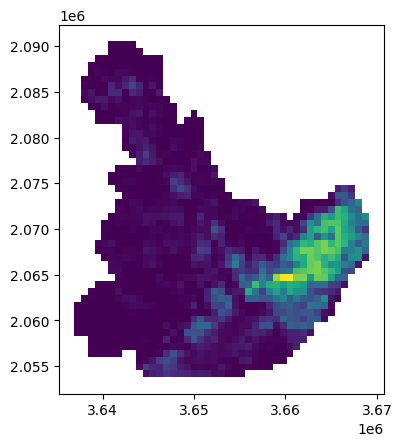

In [381]:
barce_proc_pop.plot(column='pop')

In [389]:
zff

,geometry,y,pop,veg,road,water,resi,non_resi,log_y
0,"POLYGON ((3644373.077 2053780.715, 3645123.077...",10,976.747980,21231,609,0,34839,0,2.397895
1,"POLYGON ((3645123.077 2053780.715, 3645873.077...",31,2074.847014,40384,2272,0,80960,0,3.465736
2,"POLYGON ((3645873.077 2053780.715, 3646623.077...",69,2550.379988,72250,2924,0,111248,0,4.248495
3,"POLYGON ((3646623.077 2053780.715, 3647373.077...",65,3925.898288,106554,10492,0,200294,0,4.189655
4,"POLYGON ((3647373.077 2053780.715, 3648123.077...",81,3143.012227,221536,12420,0,211002,0,4.406719
...,...,...,...,...,...,...,...,...,...
1168,"POLYGON ((3643623.077 2089030.715, 3644373.077...",9,0.000000,0,0,0,0,0,2.302585
1169,"POLYGON ((3640623.077 2089780.715, 3641373.077...",13,0.622913,649,0,0,236,0,2.639057
1170,"POLYGON ((3641373.077 2089780.715, 3642123.077...",27,0.000000,0,0,0,0,0,3.332205
1171,"POLYGON ((3642123.077 2089780.715, 3642873.077...",2,0.000000,0,0,0,0,0,1.098612


In [382]:
barce_more_feat = gpd.sjoin(barcelona_pop.to_crs(epsg=3035),barce_feat,predicate='within').groupby('index_right').sum()
barce_more_feat

/var/folders/dy/8nkgqf653sggg31kzy33mjdr0000gn/T/ipykernel_46278/2626505094.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  barce_more_feat = gpd.sjoin(barcelona_pop.to_crs(epsg=3035),barce_feat,predicate='within').groupby('index_right').sum()


,X,Y,Z,veg,road,water,resi,non_resi
index_right,,,,,,,,
0,3430350.0,103537350.0,976.747980,21231,609,0,34839,0
1,5251200.0,157772800.0,2074.847014,40384,2272,0,80960,0
2,5605200.0,167635100.0,2550.379988,72250,2924,0,111248,0
3,7121250.0,212010250.0,3925.898288,106554,10492,0,200294,0
4,7652600.0,226803700.0,3143.012227,221536,12420,0,211002,0
...,...,...,...,...,...,...,...,...
1168,8727550.0,273083850.0,0.000000,0,0,0,0,0
1169,9180650.0,292969450.0,0.622913,649,0,0,236,0
1170,8599450.0,273112150.0,0.000000,0,0,0,0,0


In [383]:
zmf = barce_more_feat.drop(columns=['X','Y']).rename(columns={'Z':'pop'})
zff = pd.merge(barc_grid,zmf,left_index=True,right_index=True)
zff

,geometry,y,pop,veg,road,water,resi,non_resi
0,"POLYGON ((3644373.077 2053780.715, 3645123.077...",10,976.747980,21231,609,0,34839,0
1,"POLYGON ((3645123.077 2053780.715, 3645873.077...",31,2074.847014,40384,2272,0,80960,0
2,"POLYGON ((3645873.077 2053780.715, 3646623.077...",69,2550.379988,72250,2924,0,111248,0
3,"POLYGON ((3646623.077 2053780.715, 3647373.077...",65,3925.898288,106554,10492,0,200294,0
4,"POLYGON ((3647373.077 2053780.715, 3648123.077...",81,3143.012227,221536,12420,0,211002,0
...,...,...,...,...,...,...,...,...
1168,"POLYGON ((3643623.077 2089030.715, 3644373.077...",9,0.000000,0,0,0,0,0
1169,"POLYGON ((3640623.077 2089780.715, 3641373.077...",13,0.622913,649,0,0,236,0
1170,"POLYGON ((3641373.077 2089780.715, 3642123.077...",27,0.000000,0,0,0,0,0
1171,"POLYGON ((3642123.077 2089780.715, 3642873.077...",2,0.000000,0,0,0,0,0


In [384]:
zff['log_y'] = np.log1p(zff['y'])

In [385]:
zff

,geometry,y,pop,veg,road,water,resi,non_resi,log_y
0,"POLYGON ((3644373.077 2053780.715, 3645123.077...",10,976.747980,21231,609,0,34839,0,2.397895
1,"POLYGON ((3645123.077 2053780.715, 3645873.077...",31,2074.847014,40384,2272,0,80960,0,3.465736
2,"POLYGON ((3645873.077 2053780.715, 3646623.077...",69,2550.379988,72250,2924,0,111248,0,4.248495
3,"POLYGON ((3646623.077 2053780.715, 3647373.077...",65,3925.898288,106554,10492,0,200294,0,4.189655
4,"POLYGON ((3647373.077 2053780.715, 3648123.077...",81,3143.012227,221536,12420,0,211002,0,4.406719
...,...,...,...,...,...,...,...,...,...
1168,"POLYGON ((3643623.077 2089030.715, 3644373.077...",9,0.000000,0,0,0,0,0,2.302585
1169,"POLYGON ((3640623.077 2089780.715, 3641373.077...",13,0.622913,649,0,0,236,0,2.639057
1170,"POLYGON ((3641373.077 2089780.715, 3642123.077...",27,0.000000,0,0,0,0,0,3.332205
1171,"POLYGON ((3642123.077 2089780.715, 3642873.077...",2,0.000000,0,0,0,0,0,1.098612


<Axes: >

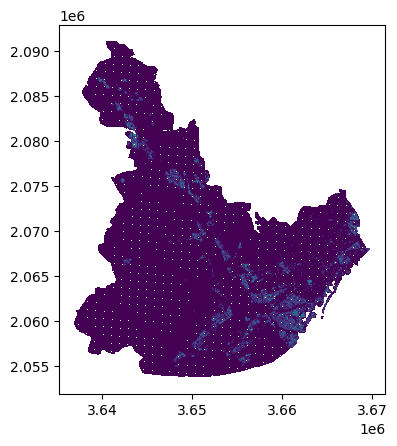

In [357]:
zff.plot(column='non_resi')

In [386]:
zff.to_file('../data/barcelona_1k.json',driver='GeoJSONSeq')

In [248]:
zff

,geometry,y,pop,veg,road,water,resi,non_resi,log_y
0,"POLYGON ((3766399.555 2884421.504, 3766699.555...",3,731.605839,11349,1575,756,5022,0,1.386294
1,"POLYGON ((3766699.555 2884421.504, 3766999.555...",21,326.769930,16281,1827,36,1548,0,3.091042
2,"POLYGON ((3766999.555 2884421.504, 3767299.555...",19,214.918960,18008,248,0,1728,0,2.995732
3,"POLYGON ((3767299.555 2884421.504, 3767599.555...",80,287.721840,19467,0,603,2268,0,4.394449
4,"POLYGON ((3767599.555 2884421.504, 3767899.555...",45,1159.603407,15100,80,0,8160,0,3.828641
...,...,...,...,...,...,...,...,...,...
1232,"POLYGON ((3762799.555 2894021.504, 3763099.555...",29,1142.346954,2490,1356,0,4176,2136,3.401197
1233,"POLYGON ((3763099.555 2894021.504, 3763399.555...",46,794.588028,1764,864,12,2442,3138,3.850148
1234,"POLYGON ((3763399.555 2894021.504, 3763699.555...",2,314.597000,282,687,0,942,1080,1.098612
1235,"POLYGON ((3763699.555 2894021.504, 3763999.555...",0,364.984074,132,1092,0,1216,304,0.000000


In [358]:
from construct_grid import *
import pandas as pd
import geopandas as gpd
import numpy as np
from shapely.geometry import Polygon, Point
def sjoin_nearest(data, squares):
    data = data.to_crs(epsg=3035)
    squares = squares.to_crs(epsg=3035)
    joined_data = gpd.sjoin_nearest(data, squares, how='left')
    joined_data = joined_data.drop_duplicates(subset='geometry').reset_index(drop=True)
    joined_data = joined_data.drop(columns='index_right')

    columns_to_drop = ['index_right', 'country_left', 'class_2018', 'identifier', 'city_name', 'country_right']
    for column in columns_to_drop:
        if column in joined_data.columns:
            joined_data.drop(columns=[column], inplace=True)

    return joined_data

#Function that combines all the different steps from construct grid
def create_squares_and_join_data(city_gdf, landuse_gdf, other_features_gdf, cell_size):
    # Step 1: Create a grid of centroids within the city polygon
    polygon_meter = city_gdf.set_crs(epsg=4326, allow_override=True)
    polygon_meter = polygon_meter.to_crs(epsg=3035)
    centroids_gdf = create_centroids_gdf(polygon_meter, cell_size)

    # Step 2: Join the landuse feature with the city polygon
    landuse_joined = join_landuse_city(city_gdf, landuse_gdf)

    # Step 3: Match the input centroid point with the land use data
    landuse_centroid = join_landuse_centroid(centroids_gdf, landuse_joined)

    # Step 4: Convert the matched centroids back into squares
    squares_gdf = points_to_squares(landuse_centroid, cell_size)

    # Step 5: Join the squares with the other feature data
    joined_data = sjoin_nearest(other_features_gdf, squares_gdf)

    return joined_data

In [360]:
barcelona_landuse

,country,fua_name,fua_code,code_2018,class_2018,prod_date,identifier,perimeter,area,comment,Pop2018,geometry
0,ES,Barcelona,ES002L2,11210,Discontinuous dense urban fabric (S.L. : 50% -...,2020-01,23440-ES002L2,265.767518,4683.861050,NaN,112,"MULTIPOLYGON (((3677813.257 2090336.719, 36778..."
1,ES,Barcelona,ES002L2,11230,Discontinuous low density urban fabric (S.L. :...,2020-01,34413-ES002L2,649.889652,14699.661187,NaN,15,"MULTIPOLYGON (((3677293.873 2081084.242, 36772..."
2,ES,Barcelona,ES002L2,12100,"Industrial, commercial, public, military and p...",2020-01,41139-ES002L2,250.192329,3554.143429,NaN,4,"MULTIPOLYGON (((3633043.659 2052433.114, 36330..."
3,ES,Barcelona,ES002L2,12100,"Industrial, commercial, public, military and p...",2020-01,42067-ES002L2,257.338961,4236.598217,NaN,7,"MULTIPOLYGON (((3653535.028 2062130.228, 36535..."
4,ES,Barcelona,ES002L2,12100,"Industrial, commercial, public, military and p...",2020-01,47644-ES002L2,530.713617,16957.211736,NaN,17,"MULTIPOLYGON (((3677022.532 2096690.738, 36770..."
...,...,...,...,...,...,...,...,...,...,...,...,...
70925,ES,Barcelona,ES002L2,32000,Herbaceous vegetation associations (natural gr...,2020-01,70519-ES002L2,1551.788356,17166.145426,NaN,0,"MULTIPOLYGON (((3697284.313 2084028.402, 36972..."
70926,ES,Barcelona,ES002L2,32000,Herbaceous vegetation associations (natural gr...,2020-01,70575-ES002L2,279.910788,2214.378709,NaN,0,"MULTIPOLYGON (((3696000.000 2084246.878, 36960..."
70927,ES,Barcelona,ES002L2,50000,Water,2020-01,70775-ES002L2,3052.844935,42770.205959,NaN,0,"MULTIPOLYGON (((3654123.804 2079000.000, 36541..."
70928,ES,Barcelona,ES002L2,50000,Water,2020-01,70822-ES002L2,986.133463,22952.725552,NaN,0,"MULTIPOLYGON (((3655313.234 2087000.000, 36553..."


<Axes: >

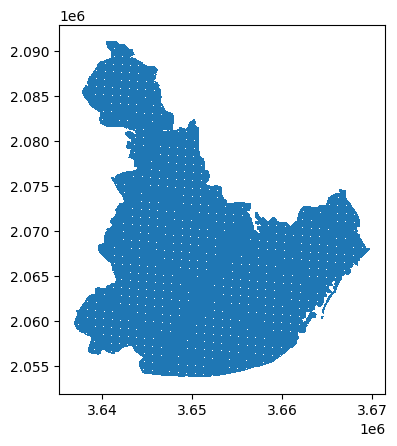

In [363]:
barcelona_features = create_squares_and_join_data(barcelona,barcelona_landuse,zff,100)
barcelona_features.plot()

<Axes: >

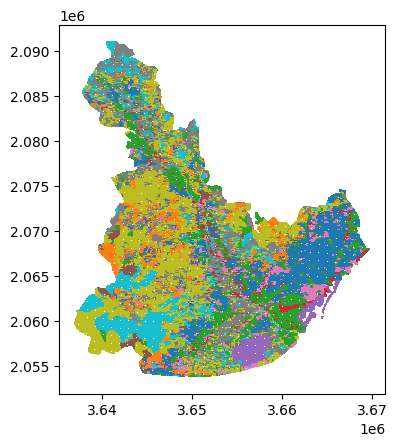

In [369]:
#barcelona_features = barcelona_features.drop(columns='index__right')
barcelona_features.plot(column='code_2018')

In [370]:
barcelona_features.to_file('../data/barcelona_with_features.json',driver='GeoJSONSeq')

In [187]:
import construct_grid

In [290]:
athens_cent = construct_grid.create_centroids_gdf(athens,100)

<Axes: >

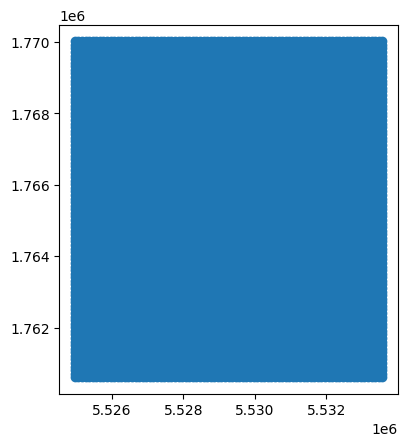

In [291]:
athens_cent.plot()

<Axes: >

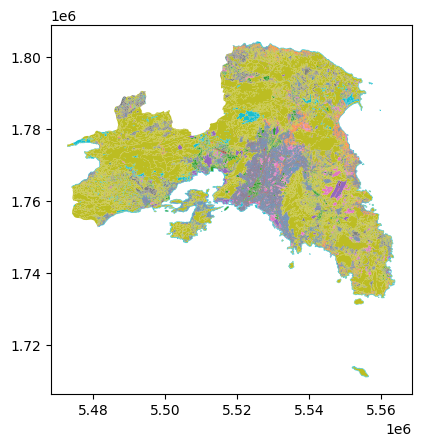

In [292]:
athens_landuse = gpd.read_file('../raw_data/raw_ath/athens_landuse.gpkg')
athens_landuse.plot(column='code_2018')

In [293]:
athens.columns = ['NAME_3','COUNTRY','geometry']
athens

,NAME_3,COUNTRY,geometry
0,Athens,Greece,"MULTIPOLYGON (((23.71660 38.00970, 23.71540 38..."


In [295]:
athens_landuse_city = construct_grid.join_landuse_city(athens,athens_landuse)

<Axes: >

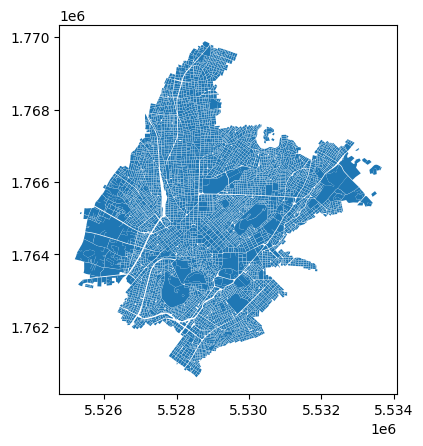

In [296]:
athens_landuse_city.plot()

In [297]:
athens_points = construct_grid.join_landuse_centroid(athens_cent,athens_landuse_city)[['code_2018','area','geometry']]
athens_points.crs.to_epsg()

3035

In [298]:
zff

,geometry,y,pop,veg,road,water,resi,non_resi,log_y
0,"POLYGON ((5528314.710 1760565.531, 5528414.710...",0,193.021866,68,0,0,212,0,0.000000
1,"POLYGON ((5528414.710 1760565.531, 5528514.710...",0,174.564178,99,0,0,156,0,0.000000
2,"POLYGON ((5528514.710 1760565.531, 5528614.710...",0,260.228058,33,0,0,260,0,0.000000
3,"POLYGON ((5528614.710 1760565.531, 5528714.710...",0,109.282539,60,0,0,72,80,0.000000
4,"POLYGON ((5528214.710 1760665.531, 5528314.710...",0,183.464325,44,0,0,296,0,0.000000
...,...,...,...,...,...,...,...,...,...
4128,"POLYGON ((5528814.710 1769865.531, 5528914.710...",0,145.668228,151,0,0,89,0,0.000000
4129,"POLYGON ((5528914.710 1769865.531, 5529014.710...",0,49.285038,58,35,0,78,0,0.000000
4130,"POLYGON ((5528614.710 1769965.531, 5528714.710...",0,208.981369,145,0,0,135,0,0.000000
4131,"POLYGON ((5528714.710 1769965.531, 5528814.710...",1,155.269211,188,0,0,97,0,0.693147


In [299]:
athens_landuse = construct_grid.points_to_squares(athens_points,100)

In [300]:
athens_with_features = gpd.sjoin_nearest(zff,athens_landuse,how='left').drop_duplicates(subset='geometry').reset_index(drop=True).drop(columns='index_right')

In [303]:
athens_with_features

,geometry,y,pop,veg,road,water,resi,non_resi,log_y,code_2018,area
0,"POLYGON ((5528314.710 1760565.531, 5528414.710...",0,193.021866,68,0,0,212,0,0.000000,11100,7727.784176
1,"POLYGON ((5528414.710 1760565.531, 5528514.710...",0,174.564178,99,0,0,156,0,0.000000,11100,7727.784176
2,"POLYGON ((5528514.710 1760565.531, 5528614.710...",0,260.228058,33,0,0,260,0,0.000000,11100,7727.784176
3,"POLYGON ((5528614.710 1760565.531, 5528714.710...",0,109.282539,60,0,0,72,80,0.000000,11100,4965.078941
4,"POLYGON ((5528214.710 1760665.531, 5528314.710...",0,183.464325,44,0,0,296,0,0.000000,11210,7401.401496
...,...,...,...,...,...,...,...,...,...,...,...
4097,"POLYGON ((5528814.710 1769865.531, 5528914.710...",0,145.668228,151,0,0,89,0,0.000000,14200,21421.156718
4098,"POLYGON ((5528914.710 1769865.531, 5529014.710...",0,49.285038,58,35,0,78,0,0.000000,14200,21421.156718
4099,"POLYGON ((5528614.710 1769965.531, 5528714.710...",0,208.981369,145,0,0,135,0,0.000000,14200,21421.156718
4100,"POLYGON ((5528714.710 1769965.531, 5528814.710...",1,155.269211,188,0,0,97,0,0.693147,14200,21421.156718


In [302]:
athens_with_features.to_file('../data/athens_with_features.json',driver='GeoJSONSeq')

In [391]:
from demeter.main_interface.raster2features import raster2features

In [394]:
built_path = '/Users/zilikons/code/zilikons/demeter/raw_data/raw_ce/GHS_BUILT_C_MSZ_E2018_GLOBE_R2022A_54009_10_V1_0_R4_C19.tif'
pop_path = '/Users/zilikons/code/zilikons/demeter/raw_data/raw_ce/GHS_POP_E2020_GLOBE_R2022A_54009_100_V1_0_R4_C19.tif'

In [399]:
zurich_grid = make_grid(zurich,300)
zurich_grid

,geometry
0,"POLYGON ((4207630.787 2691275.062, 4207930.787..."
1,"POLYGON ((4207930.787 2691275.062, 4208230.787..."
2,"POLYGON ((4208230.787 2691275.062, 4208530.787..."
3,"POLYGON ((4208530.787 2691275.062, 4208830.787..."
4,"POLYGON ((4208830.787 2691275.062, 4209130.787..."
...,...
1109,"POLYGON ((4210930.787 2703575.062, 4211230.787..."
1110,"POLYGON ((4211230.787 2703575.062, 4211530.787..."
1111,"POLYGON ((4211530.787 2703575.062, 4211830.787..."
1112,"POLYGON ((4211830.787 2703575.062, 4212130.787..."


In [ ]:
zurich_y

In [410]:
zff = raster2features(zurich,zurich_y.set_crs(epsg=4326),built_path,pop_path,grid_size=300)

array('d', [8.6268, 8.6268, 8.4559, 8.4559, 8.6268])
array('d', [47.3248, 47.44, 47.44, 47.3248, 47.3248])
array('d', [678513.2565181629, 677580.5985018384, 664157.4839884656, 665071.6657152054, 678513.2565181629])
array('d', [5590511.695578885, 5602809.816432957, 5602809.816432957, 5590511.695578885, 5590511.695578885])
array('d', [8.6268, 8.6268, 8.4559, 8.4559, 8.6268])
array('d', [47.3248, 47.44, 47.44, 47.3248, 47.3248])
array('d', [678513.2565181629, 677580.5985018384, 664157.4839884656, 665071.6657152054, 678513.2565181629])
array('d', [5590511.695578885, 5602809.816432957, 5602809.816432957, 5590511.695578885, 5590511.695578885])


/Users/zilikons/code/zilikons/demeter/demeter/preproc_logic/gpd2grid_features.py:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gdf_proc_grouped = gdf_proc.groupby('index_right').sum()
/Users/zilikons/code/zilikons/demeter/demeter/main_interface/raster2features.py:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  city_more_feat = gpd.sjoin(city_pop.to_crs(epsg=3035),city_feat,predicate='within').groupby('index_right').sum()


In [411]:
zff.to_file('../data/zurich_1k.json',driver='GeoJSONSeq')

<Axes: >

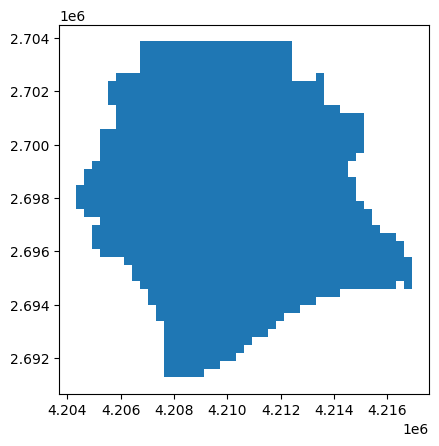

In [413]:
zff.plot()

In [414]:
zff

,geometry,y,pop,veg,road,water,resi,non_resi
0,"POLYGON ((4207630.787 2691275.062, 4207930.787...",0,0.000000,0,0,0,0,0
1,"POLYGON ((4207930.787 2691275.062, 4208230.787...",0,10.921446,0,0,0,0,0
2,"POLYGON ((4208230.787 2691275.062, 4208530.787...",0,167.941788,3900,0,0,1500,0
3,"POLYGON ((4208530.787 2691275.062, 4208830.787...",0,416.209759,9117,0,9,5598,612
4,"POLYGON ((4208830.787 2691275.062, 4209130.787...",0,131.395666,3771,45,0,2637,0
...,...,...,...,...,...,...,...,...
1109,"POLYGON ((4210930.787 2703575.062, 4211230.787...",0,56.949681,1557,0,0,756,0
1110,"POLYGON ((4211230.787 2703575.062, 4211530.787...",0,55.566882,1800,0,0,1740,1860
1111,"POLYGON ((4211530.787 2703575.062, 4211830.787...",0,46.179538,430,0,0,1040,500
1112,"POLYGON ((4211830.787 2703575.062, 4212130.787...",0,12.387394,330,0,0,200,0


<Axes: >

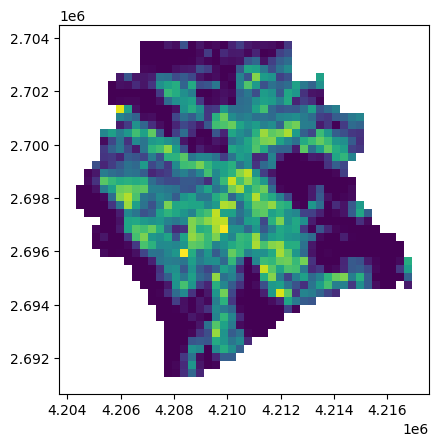

In [417]:
zff.plot(column='pop')

<Axes: >

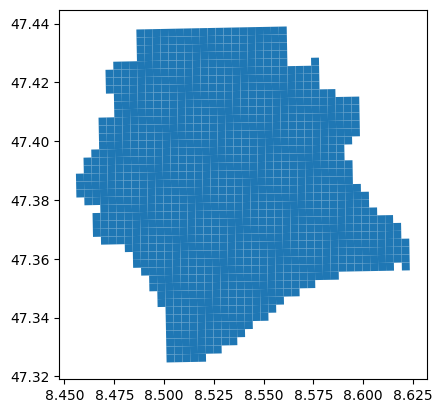

In [419]:
gpd.read_file('https://raw.githubusercontent.com/zilikons/demeter/master/data/zurich_1k.json').plot()

In [433]:
athens_features = gpd.read_file('https://raw.githubusercontent.com/zilikons/demeter/master/data/berlin_with_features.json')

In [424]:
from params import *

In [434]:
athens_features

,veg,road,water,resi,non_resi,land_use_code,land_use_area,pop,y,log_y,geometry
0,165,0,0,30,0,11220,95051.225653,90.136093,0.2,-1.609438,"POLYGON ((13.64540 52.34009, 13.64686 52.34005..."
1,181,0,0,39,0,11220,26392.319278,90.136093,0.2,-1.609438,"POLYGON ((13.64686 52.34005, 13.64833 52.34000..."
2,195,0,0,35,0,11220,95051.225653,44.143646,0.2,-1.609438,"POLYGON ((13.64547 52.34099, 13.64694 52.34094..."
3,204,0,0,29,0,11220,26392.319278,44.143646,3.0,1.098612,"POLYGON ((13.64694 52.34094, 13.64840 52.34090..."
4,102,0,0,27,0,11220,95051.225653,44.143646,0.2,-1.609438,"POLYGON ((13.64555 52.34189, 13.64701 52.34184..."
...,...,...,...,...,...,...,...,...,...,...,...
71382,0,0,0,0,0,32000,13737.505410,0.000000,1.0,0.000000,"POLYGON ((13.47285 52.66910, 13.47433 52.66906..."
71383,0,0,0,0,0,23000,25948.699349,0.000000,0.2,-1.609438,"POLYGON ((13.47292 52.67000, 13.47440 52.66995..."
71384,0,0,0,0,0,23000,25948.699349,0.000000,0.2,-1.609438,"POLYGON ((13.47299 52.67089, 13.47447 52.67085..."
71385,0,0,0,0,0,23000,25948.699349,0.000000,0.2,-1.609438,"POLYGON ((13.47306 52.67179, 13.47454 52.67175..."


In [432]:
import altair as alt
athens_features['code_2018'] = athens_features['code_2018'].astype(int).map(URBAN_ATLAS_LAND_USE)
brush = alt.selection(type='interval')
points = alt.Chart(athens_features).mark_point().encode(
    x='veg',
    y='pop',
    color = alt.condition(brush, 'code_2018', alt.value('lightgray'))
).add_selection(
    brush
)
bars = alt.Chart(athens_features).mark_bar().encode(
    y = 'code_2018',
    color = 'code_2018',
    x = 'count(code_2018)'    
).transform_filter(
    brush
)
points & bars

alt.VConcatChart(...)

In [440]:
athens = gpd.read_file('/Users/zilikons/code/zilikons/demeter/raw_data/Moxap_tx132.shp')
athens

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "fiona/ogrext.pyx", line 136, in fiona.ogrext.gdal_open_vector
  File "fiona/_err.pyx", line 291, in fiona._err.exc_wrap_pointer
fiona._err.CPLE_OpenFailedError: Unable to open /Users/zilikons/code/zilikons/demeter/raw_data/Moxap_tx132.shx or /Users/zilikons/code/zilikons/demeter/raw_data/Moxap_tx132.SHX. Set SHAPE_RESTORE_SHX config option to YES to restore or create it.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/zilikons/.pyenv/versions/3.10.6/envs/demeter/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/dy/8nkgqf653sggg31kzy33mjdr0000gn/T/ipykernel_46278/882370550.py", line 1, in <module>
    athens = gpd.read_file('/Users/zilikons/code/zilikons/demeter/raw_data/Moxap_tx132.shp')
  File "/Users/zilikons/.pyenv/versions/3.10.6/envs/demeter/lib/python3.10/s

In [442]:
uk = gpd.read_file('../raw_data/raw_countries/gadm41_GBR_3.json')

In [454]:
england = uk[uk['NAME_1']=='England']

In [ ]:
from shapely import geometry

p1 = geometry.Point(-0.406630,51.590919)
p2 = geometry.Point(0.088491,51.592977)
p3 = geometry.Point(0.106707, 51.371260)
p4 = geometry.Point(-0.363576, 51.364023)

plist = [p1,p2,p3,p4]
poly = geometry.Polygon([p.x,p.y] for p in plist)

<Axes: >

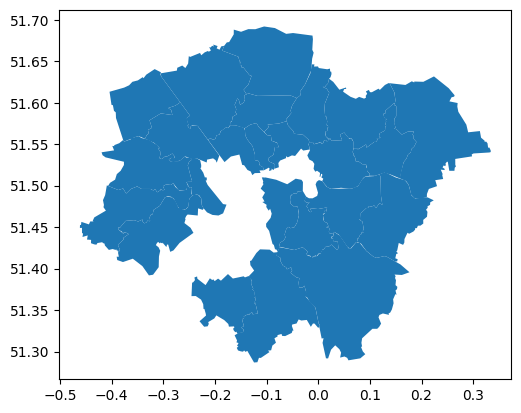

In [484]:
england[england['TYPE_3']=='Londonborough'].plot()

In [462]:
london = england[england['NAME_3']=='CityofLondon'][['NAME_3','COUNTRY','geometry']]
london.columns = ['city_name','country','geometry']
london['city_name'] = 'London'
london

,city_name,country,geometry
65,London,UnitedKingdom,"MULTIPOLYGON (((-0.08610 51.50780, -0.11140 51..."


In [463]:
london.total_bounds

array([-0.1138, 51.5071, -0.0758, 51.522 ])

In [464]:
london_y = filter_csv(csv_path,london.total_bounds)
london_y

value error! 
value error! 
value error! 
value error! 
value error! 
value error! 
value error! 
value error! 
value error! 
value error! 
value error! 
value error! 
value error! 
value error! 
value error! Lello Hund, Anne Molia AM-69-2012
value error! Lello Hund, Anne Molia AM-74-2012
value error! Lello Hund, Anne Molia AM-76-2012
value error! Lello Hund, Anne Molia AM-36-2012
value error! Lello Hund, Anne Molia AM-35-2012
value error! Lello Hund, Anne Molia AM-37-2012
value error! Lello Hund, Anne Molia AM-70-2012
value error! Lello Hund, Anne Molia AM-73-2012
value error! Lello Hund, Anne Molia AM-38-2012
value error! Lello Hund, Anne Molia Vorte 1
value error! 
value error! 


,decimalLatitude,decimalLongitude
0,51.516815,-0.096029
1,51.516575,-0.095766
2,51.508163,-0.079346
3,51.508286,-0.109259
4,51.512962,-0.097407
...,...,...
1604,51.508415,-0.077784
1605,51.508499,-0.102494
1606,51.517780,-0.095165
1607,51.520206,-0.095994


In [469]:
london_y1 = gpd.GeoDataFrame(london_y,geometry=gpd.points_from_xy(x=london_y.decimalLongitude,y=london_y.decimalLatitude),crs='epsg:4326')
london_y1

,decimalLatitude,decimalLongitude,geometry
0,51.516815,-0.096029,POINT (-0.09603 51.51682)
1,51.516575,-0.095766,POINT (-0.09577 51.51657)
2,51.508163,-0.079346,POINT (-0.07935 51.50816)
3,51.508286,-0.109259,POINT (-0.10926 51.50829)
4,51.512962,-0.097407,POINT (-0.09741 51.51296)
...,...,...,...
1604,51.508415,-0.077784,POINT (-0.07778 51.50842)
1605,51.508499,-0.102494,POINT (-0.10249 51.50850)
1606,51.517780,-0.095165,POINT (-0.09516 51.51778)
1607,51.520206,-0.095994,POINT (-0.09599 51.52021)


In [471]:
london_y1 = london_y1.drop(columns=['decimalLatitude','decimalLongitude'])
london_y1

,geometry
0,POINT (-0.09603 51.51682)
1,POINT (-0.09577 51.51657)
2,POINT (-0.07935 51.50816)
3,POINT (-0.10926 51.50829)
4,POINT (-0.09741 51.51296)
...,...
1604,POINT (-0.07778 51.50842)
1605,POINT (-0.10249 51.50850)
1606,POINT (-0.09516 51.51778)
1607,POINT (-0.09599 51.52021)


<Axes: >

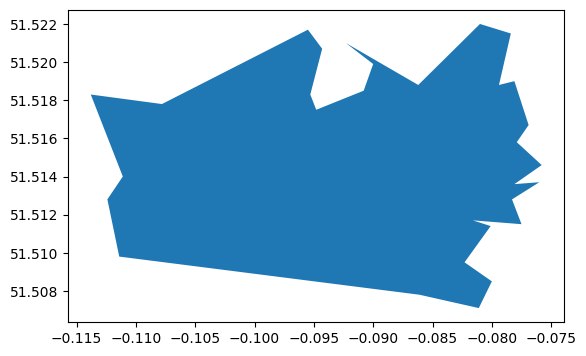

In [465]:
london.plot()

In [477]:
pop_path = '/Users/zilikons/code/zilikons/demeter/raw_data/raw_ce/GHS_POP_E2020_GLOBE_R2022A_54009_100_V1_0_R3_C19.tif'
built_path = '/Users/zilikons/code/zilikons/demeter/raw_data/raw_ce/GHS_BUILT_C_MSZ_E2018_GLOBE_R2022A_54009_10_V1_0_R3_C19.tif'

In [479]:
cff = raster2features(london,london_y1,built_path,pop_path)
cff

array('d', [-0.0758, -0.0758, -0.1138, -0.1138, -0.0758])
array('d', [51.5071, 51.522, 51.522, 51.5071, 51.5071])
array('d', [-5649.539274368813, -5648.371589863822, -8480.009062354919, -8481.76212959328, -5649.539274368813])
array('d', [6030372.398767553, 6031914.24343906, 6031914.24343906, 6030372.398767553, 6030372.398767553])
array('d', [-0.0758, -0.0758, -0.1138, -0.1138, -0.0758])
array('d', [51.5071, 51.522, 51.522, 51.5071, 51.5071])
array('d', [-5649.539274368813, -5648.371589863822, -8480.009062354919, -8481.76212959328, -5649.539274368813])
array('d', [6030372.398767553, 6031914.24343906, 6031914.24343906, 6030372.398767553, 6030372.398767553])


/Users/zilikons/code/zilikons/demeter/demeter/preproc_logic/gpd2grid_features.py:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gdf_proc_grouped = gdf_proc.groupby('index_right').sum()
/Users/zilikons/code/zilikons/demeter/demeter/main_interface/raster2features.py:23: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cmf = city_more_feat.drop(columns=['X','Y']).rename(columns={'Z':'pop'})


,geometry,y,pop,veg,road,water,resi,non_resi,log_y
1,"POLYGON ((3623466.570 3203422.553, 3623566.570...",1,0.070303,0,0,0,0,0,0.693147
2,"POLYGON ((3623566.570 3203422.553, 3623666.570...",0,2.051252,10,0,2,36,0,0.000000
3,"POLYGON ((3623666.570 3203422.553, 3623766.570...",4,5.307798,14,0,5,53,28,1.609438
4,"POLYGON ((3622966.570 3203522.553, 3623066.570...",1,0.000000,0,0,7,0,0,0.693147
5,"POLYGON ((3623066.570 3203522.553, 3623166.570...",0,0.000000,0,0,0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...
325,"POLYGON ((3622466.570 3205022.553, 3622566.570...",3,30.447392,64,0,0,124,51,1.386294
326,"POLYGON ((3622566.570 3205022.553, 3622666.570...",8,63.497669,148,0,0,129,0,2.197225
327,"POLYGON ((3622666.570 3205022.553, 3622766.570...",3,174.812851,28,34,0,152,0,1.386294
328,"POLYGON ((3622766.570 3205022.553, 3622866.570...",39,372.606812,71,9,0,200,0,3.688879


<Axes: >

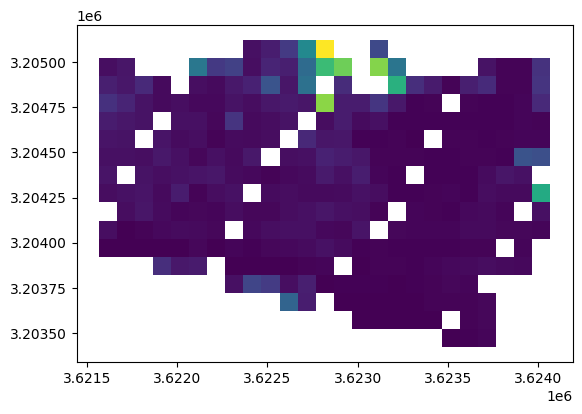

In [481]:
cff.plot(column='pop')